<a href="https://colab.research.google.com/github/ChNavya-777/Attendance-Management-System/blob/main/Insurance_Claim_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Insurance_Claim_Approval (1).csv')
df.head()

,Claim_ID,Age,Claim_Amount,Claim_Type,Claim_Approved,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
0,a2b19024-95b1-4d8d-b638-915c99efaf6f,29,18221.953701,Health,No,14,0,Unemployed,77151.283717,South,3.455448
1,ba33986b-d264-41e8-9013-a31b9a71c296,19,48953.944888,Accident,No,10,0,Employed,68593.554082,East,2.680455
2,4e7065ec-fbb3-40e8-8c11-8ef39d4a74d1,43,34796.199019,Property,No,16,1,Self-Employed,70050.038527,West,2.539976
3,8c18a52a-f151-446e-b184-624141fdab15,70,40540.849447,Life,Yes,3,2,Unemployed,33180.818989,East,4.130486
4,2cdf7d8e-1301-4afc-a0cf-3b5cfd909aec,48,30314.632110,Accident,No,17,0,Unemployed,108485.309094,North,2.238877


In [ ]:
df.shape

(1500, 11)

In [ ]:
data_cols = df.columns.tolist()
print(data_cols)


['Claim_ID', 'Age', 'Claim_Amount', 'Claim_Type', 'Claim_Approved', 'Policy_Duration', 'Previous_Claims', 'Employment_Status', 'Income', 'Region', 'Customer_Rating']


In [ ]:
df.dtypes

,0
Claim_ID,object
Age,int64
Claim_Amount,float64
Claim_Type,object
Claim_Approved,object
Policy_Duration,int64
Previous_Claims,int64
Employment_Status,object
Income,float64
Region,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Claim_ID           1500 non-null   object 
 1   Age                1500 non-null   int64  
 2   Claim_Amount       1408 non-null   float64
 3   Claim_Type         1500 non-null   object 
 4   Claim_Approved     1500 non-null   object 
 5   Policy_Duration    1500 non-null   int64  
 6   Previous_Claims    1500 non-null   int64  
 7   Employment_Status  1500 non-null   object 
 8   Income             1500 non-null   float64
 9   Region             1500 non-null   object 
 10  Customer_Rating    1414 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [ ]:
df.isnull().sum()

,0
Claim_ID,0
Age,0
Claim_Amount,92
Claim_Type,0
Claim_Approved,0
Policy_Duration,0
Previous_Claims,0
Employment_Status,0
Income,0
Region,0


In [ ]:
df.drop(columns=['Claim_ID','Customer_Rating','Region'], inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   int64  
 1   Claim_Amount       1408 non-null   float64
 2   Claim_Type         1500 non-null   object 
 3   Claim_Approved     1500 non-null   object 
 4   Policy_Duration    1500 non-null   int64  
 5   Previous_Claims    1500 non-null   int64  
 6   Employment_Status  1500 non-null   object 
 7   Income             1500 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns


Index(['Age', 'Claim_Amount', 'Policy_Duration', 'Previous_Claims', 'Income'], dtype='object')

In [ ]:
cat_columns

Index(['Claim_Type', 'Claim_Approved', 'Employment_Status'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Age,0
Claim_Amount,92
Claim_Type,0
Claim_Approved,0
Policy_Duration,0
Previous_Claims,0
Employment_Status,0
Income,0


In [ ]:
df['Claim_Amount'] = df['Claim_Amount'].fillna(df['Claim_Amount'].mean())


In [ ]:
df.isnull().sum()

,0
Age,0
Claim_Amount,0
Claim_Type,0
Claim_Approved,0
Policy_Duration,0
Previous_Claims,0
Employment_Status,0
Income,0


In [ ]:
from sklearn.preprocessing  import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
  df[column] = label_encoder.fit_transform(df[column])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   float64
 1   Claim_Amount       1500 non-null   float64
 2   Claim_Type         1500 non-null   int64  
 3   Claim_Approved     1500 non-null   int64  
 4   Policy_Duration    1500 non-null   float64
 5   Previous_Claims    1500 non-null   float64
 6   Employment_Status  1500 non-null   int64  
 7   Income             1500 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 93.9 KB


In [ ]:
X = df.drop('Claim_Approved', axis=1)
y=df['Claim_Approved']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


Random Forest Accuracy: 0.5033333333333333
Random Forest Confusion Matrix:
 [[67 77]
 [72 84]]


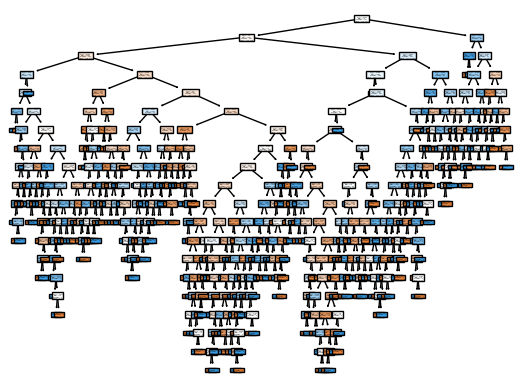

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)


Logistic Regression Accuracy: 0.5133333333333333
Logistic Regression Confusion Matrix:
 [[57 87]
 [59 97]]


In [ ]:
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [ ]:
print(best_model)

LogisticRegression()


In [ ]:
import pickle
with open('best_model.pkl', 'wb') as file:
  pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
print("Loading data and recreating preprocessors...")
df_setup =pd.read_csv('/content/Insurance_Claim_Approval (1).csv')

Loading data and recreating preprocessors...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   float64
 1   Claim_Amount       1500 non-null   float64
 2   Claim_Type         1500 non-null   int64  
 3   Claim_Approved     1500 non-null   int64  
 4   Policy_Duration    1500 non-null   float64
 5   Previous_Claims    1500 non-null   float64
 6   Employment_Status  1500 non-null   int64  
 7   Income             1500 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 93.9 KB


In [ ]:
target_col='Claim_Approved'
cols_to_drop=['Claim_ID','Customer_Rating','Region']

In [ ]:
if target_col in df_setup.columns:
   X_ref = df_setup.drop(columns=[target_col])
else:
   X_ref = df_setup.copy()

In [ ]:
existing_drop = [c for c in cols_to_drop if c in X_ref.columns]
if existing_drop:
   X_ref.drop(columns=existing_drop, inplace=True)

In [ ]:
num_cols = X_ref.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_ref.select_dtypes(include=['object']).columns.tolist()

In [ ]:
encoders = {}
scaler = MinMaxScaler()

In [ ]:
for col in cat_cols:
   le = LabelEncoder()
   X_ref[col] = X_ref[col].fillna(X_ref[col].mode().iloc[0])
   X_ref[col] = le.fit_transform(X_ref[col])
   encoders[col] = le

In [ ]:
X_ref[num_cols] = X_ref[num_cols].fillna(X_ref[num_cols].mean())
scaler.fit(X_ref[num_cols])

MinMaxScaler()

In [ ]:
with open('best_model.pkl', 'rb') as file:
   model = pickle.load(file)
print("Setup complete. Launching UI...")

Setup complete. Launching UI...


In [ ]:
def predict_outcome(*args):
   input_data = pd.DataFrame([args], columns=cat_cols + num_cols)
   for col in cat_cols:
    val=input_data[col].iloc[0]
    if pd.isna(val):
      val=df_setup[col].mode().iloc[0]
    try:
      input_data[col] = encoders[col].transform([val])
    except ValueError:
      input_data[col]=0
   input_data[num_cols] = input_data[num_cols].fillna(df_setup[num_cols].mean().iloc[0])
   input_data[num_cols] = scaler.transform(input_data[num_cols])
   input_data = input_data[X_ref.columns]
   prediction = model.predict(input_data)
   return f"Predicted Target: {prediction[0]}"



In [ ]:
import pandas as pd

ui_inputs = []
original_df=pd.read_csv('/content/Insurance_Claim_Approval (1).csv')


In [ ]:
for col in cat_cols:
   unique_vals = original_df[col].dropna().unique().tolist()
   ui_inputs.append(gr.Dropdown(choices=unique_vals, label=f"{col} (Select Option)"))
for col in num_cols:
 ui_inputs.append(gr.Number(label=f"{col} (Enter Number)"))
 iface = gr.Interface( fn=predict_outcome, inputs=ui_inputs, outputs="text", title="Classifier Prediction App", description="Enter the feature values below to get a prediction from the best model.")


In [ ]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3bc1e63974f85ef816.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
